<a href="https://colab.research.google.com/github/Takfes/notes-deep-learning/blob/main/01_pytorch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# > Basic Functionalities
# %load code.py
# %pycat code.py
# !rm code.py
# %%writefile code.py

# > Enable interactive tables
# %load_ext google.colab.data_table
# %unload_ext google.colab.data_table

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Define Functions

In [6]:
def regression(x, alpha, beta):
    return x * alpha + beta

In [106]:
def regression_plot(xs, ys, alpha=None, beta=None):
    xs,ys = xs.detach().numpy(),ys.detach().numpy()
    fig, ax = plt.subplots(figsize=(8,3))
    ax.scatter(xs, ys)
    x_min, x_max = ax.get_xlim()
    ax.set_xlim([x_min, x_max])
    if (alpha is not None) & (beta is not None):
        alpha,beta = alpha.detach().numpy(),beta.detach().numpy()
        y_min = regression(x_min, alpha, beta)
        y_max = regression(x_max, alpha, beta)
        _ = ax.plot([x_min, x_max], [y_min, y_max])

In [8]:
def mse(y,yhat):
    return torch.sum((y-yhat)**2)/len(y)

### Settings

In [121]:
RANDOM_SEED = 1990
NOISE_STD = 0.2
ALPHA = -0.5
BETA = 2
LEARNING_RATE = 0.01
EPOCHS = 1_000

In [5]:
# Set the seed for generating random numbers
print(f"{torch.__version__=}")
print(f"{torch.cuda.is_available()=}")
torch.manual_seed(RANDOM_SEED)

# If using CUDA, set the seed for all GPUs
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(RANDOM_SEED)

torch.__version__='2.1.0+cu121'
torch.cuda.is_available()=True


### Generate data

Remember the data generation process assumed : a = -0.5 | b = 2

In our example, initial values set such that : a = 0.9000 | b = 0.1000



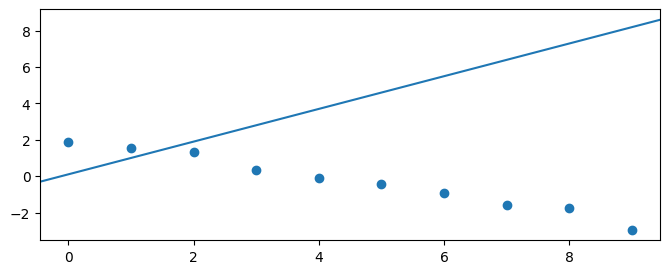

In [209]:
# Create X
x = torch.arange(0,10, dtype=torch.float32, requires_grad=True)
# Create Noise
noise = torch.normal(mean = torch.zeros_like(x), std = NOISE_STD)
# Create y = alpha * x + beta + noise
y = ALPHA * x + BETA + noise

# Initialize a & b
a = torch.tensor([0.9], requires_grad=True)
b = torch.tensor([0.1]).requires_grad_()

# # Check requires_grad attribute
# print(f"{x.requires_grad=}, {y.requires_grad=}, {noise.requires_grad=}")
# print(f"{a.requires_grad=}, {b.requires_grad=}")

print(f"Remember the data generation process assumed : a = {ALPHA} | b = {BETA}\n")
print(f"In our example, initial values set such that : a = {a.item():.4f} | b = {b.item():.4f}\n")

# Regression plot based on initial values
regression_plot(x, y, a, b)

# Prepare a second set of parameters for later use
x2, y2, a2, b2 = x, y, a, b

### Training loop custom

In [210]:
for epoch in range(EPOCHS):

    # 1. Forward Pass
    yhat = regression(x,a,b)

    # 2. Calculate Loss
    error = mse(y,yhat)

    # 3. Calculate Gradients
    error.backward(retain_graph=True)
    # print(f"> gradients : a_grad = {a.grad.item():.4f},b_grad = {b.grad.item():.4f}")

    # 4. Gradient Descent
    a_update, b_update = a.grad * LEARNING_RATE, b.grad * LEARNING_RATE
    a.data = a.data - a_update
    b.data = b.data - b_update
    # print(f"> updates : a_update = {a_update.item():.4f}, b_update = {b_update.item():.4f}")
    # print(f"> backpropagation : a_new = {a.item():.4f}, b_new = {b.item():.4f}")

    # Log progress & parameters
    if (epoch % 100 == 0) or (epoch < 20):
        print(f"{epoch} a = {a.item():.4f} | b = {b.item():.4f} | {error=:.4f}")

    # Clean out gradients
    a.grad.zero_()
    b.grad.zero_()

# Final values
print(f"\nFinal values after training : a = {a.item():.4f} | b = {b.item():.4f}")
print(f"Remember the data generation process assumed : a = {ALPHA} | b = {BETA}\n")

0 a = 0.2692 | b = 0.0117 | error=36.0491
1 a = 0.0060 | b = -0.0180 | error=7.3316
2 a = -0.1046 | b = -0.0235 | error=2.3583
3 a = -0.1516 | b = -0.0189 | error=1.4872
4 a = -0.1723 | b = -0.0101 | error=1.3249
5 a = -0.1819 | b = 0.0003 | error=1.2853
6 a = -0.1870 | b = 0.0114 | error=1.2669
7 a = -0.1902 | b = 0.0227 | error=1.2524
8 a = -0.1926 | b = 0.0341 | error=1.2386
9 a = -0.1946 | b = 0.0454 | error=1.2252
10 a = -0.1966 | b = 0.0568 | error=1.2118
11 a = -0.1984 | b = 0.0681 | error=1.1987
12 a = -0.2002 | b = 0.0793 | error=1.1857
13 a = -0.2020 | b = 0.0904 | error=1.1728
14 a = -0.2038 | b = 0.1015 | error=1.1601
15 a = -0.2055 | b = 0.1125 | error=1.1475
16 a = -0.2073 | b = 0.1235 | error=1.1351
17 a = -0.2090 | b = 0.1344 | error=1.1228
18 a = -0.2107 | b = 0.1452 | error=1.1106
19 a = -0.2124 | b = 0.1560 | error=1.0986
100 a = -0.3238 | b = 0.8544 | error=0.4651
200 a = -0.4065 | b = 1.3731 | error=0.1794
300 a = -0.4535 | b = 1.6676 | error=0.0873
400 a = -0.4802

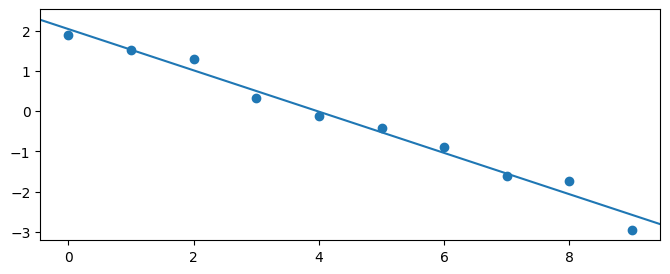

In [211]:
regression_plot(x, y, a, b)

### Training loop w/ optimizer

In [212]:
optimizer = torch.optim.SGD([a2, b2], lr=LEARNING_RATE)
for epoch in range(EPOCHS):

    optimizer.zero_grad() # Reset gradients to zero; else they accumulate

    yhat2 = regression(x2, a2, b2) # Step 1
    error2 = mse(yhat2, y2) # Step 2

    error2.backward(retain_graph=True) # Step 3
    optimizer.step() # Step 4

    if (epoch % 100 == 0) or (epoch < 20):
        print(f"{epoch} a = {a2.item():.4f} | b = {b2.item():.4f} | {error2=:.4f}")
    # print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % a2.grad.item(), '%.3g' % b2.grad.item()))

# Final values
print(f"\nFinal values after training : a = {a.item():.4f} | b = {b.item():.4f}")
print(f"\nFinal values after training : a2 = {a2.item():.4f} | b2 = {b2.item():.4f}")
print(f"Remember the data generation process assumed : a = {ALPHA} | b = {BETA}\n")

0 a = -0.5140 | b = 2.0468 | error2=0.0436
1 a = -0.5140 | b = 2.0468 | error2=0.0436
2 a = -0.5140 | b = 2.0469 | error2=0.0436
3 a = -0.5140 | b = 2.0469 | error2=0.0436
4 a = -0.5140 | b = 2.0470 | error2=0.0436
5 a = -0.5140 | b = 2.0470 | error2=0.0436
6 a = -0.5140 | b = 2.0470 | error2=0.0436
7 a = -0.5140 | b = 2.0471 | error2=0.0436
8 a = -0.5140 | b = 2.0471 | error2=0.0436
9 a = -0.5140 | b = 2.0472 | error2=0.0436
10 a = -0.5140 | b = 2.0472 | error2=0.0436
11 a = -0.5140 | b = 2.0472 | error2=0.0436
12 a = -0.5141 | b = 2.0473 | error2=0.0436
13 a = -0.5141 | b = 2.0473 | error2=0.0436
14 a = -0.5141 | b = 2.0473 | error2=0.0436
15 a = -0.5141 | b = 2.0474 | error2=0.0436
16 a = -0.5141 | b = 2.0474 | error2=0.0436
17 a = -0.5141 | b = 2.0475 | error2=0.0436
18 a = -0.5141 | b = 2.0475 | error2=0.0436
19 a = -0.5141 | b = 2.0475 | error2=0.0436
100 a = -0.5145 | b = 2.0500 | error2=0.0436
200 a = -0.5148 | b = 2.0518 | error2=0.0436
300 a = -0.5149 | b = 2.0528 | error2=0.

### Extra : visualize a DAG

In [194]:
! pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=6565ac2a57dab5db21e97c5cd80b14d0a12771eb7599c49e95a5b84fd7d29441
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


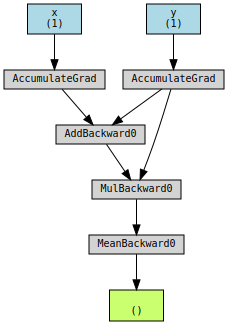

In [196]:
from torchviz import make_dot

# Define a simple computation graph
x = torch.randn(1, requires_grad=True)
y = torch.randn(1, requires_grad=True)
a = x + y
b = a * y
c = b.mean()

# Visualize the graph
dot = make_dot(c, params={'x': x, 'y': y})

# To render the graph (requires Graphviz installed on your system)
dot.render('computational_graph', format='png')

# Or to just display it in Jupyter Notebook (if you're using one)
dot

In [213]:
def render_graph(tensor, params=None):
    from torchviz import make_dot
    # Visualize the graph
    dot = make_dot(tensor, params=params)
    # Render the graph to a file (requires Graphviz installed on your system)
    dot.render('computational_graph', format='png')
    # Display in Jupyter Notebook (if using one)
    return dot

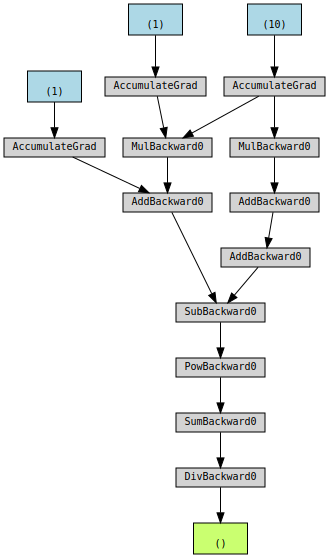

In [214]:
render_graph(error)